<a href="https://colab.research.google.com/github/TishyaJ/Market_Data_Analysis/blob/main/Wine%20Quality%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No missing values found in the dataset.

---- Data Analysis Results ----

## 1. Wine Quality Frequency and Range ##
The most frequently occurring wine quality score is: 5
The highest quality score is: 8
The lowest quality score is: 3
Conclusion: Most wines in this dataset are of average quality (5), with scores ranging from 3 to 8.

## 2. Feature Correlation with Quality ##
Correlation between 'fixed acidity' and quality: 0.1241
Correlation between 'alcohol' and quality: 0.4762
Correlation between 'free sulfur dioxide' and quality: -0.0507


/tmp/ipython-input-2-3662479097.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='alcohol', data=df, palette='viridis')


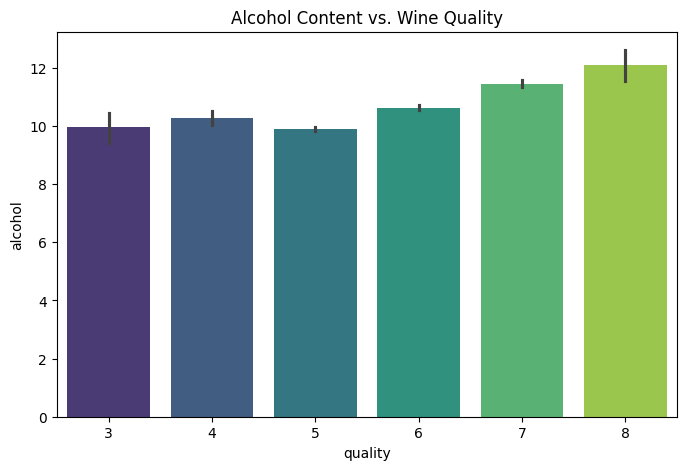


Conclusion: Alcohol content has the strongest positive correlation with quality, while fixed acidity has a weak positive correlation and free sulfur dioxide has a weak negative one.

## 3. Average Residual Sugar by Quality Extremes ##
Average residual sugar for the best quality wines (score 8): 2.58 g/L
Average residual sugar for the lowest quality wines (score 3): 2.64 g/L

Conclusion: The best and lowest quality wines have very similar average residual sugar levels.

## 4. Effect of Volatile Acidity on Quality ##
Correlation between 'volatile acidity' and quality: -0.3906


/tmp/ipython-input-2-3662479097.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='volatile acidity', data=df, palette='plasma')


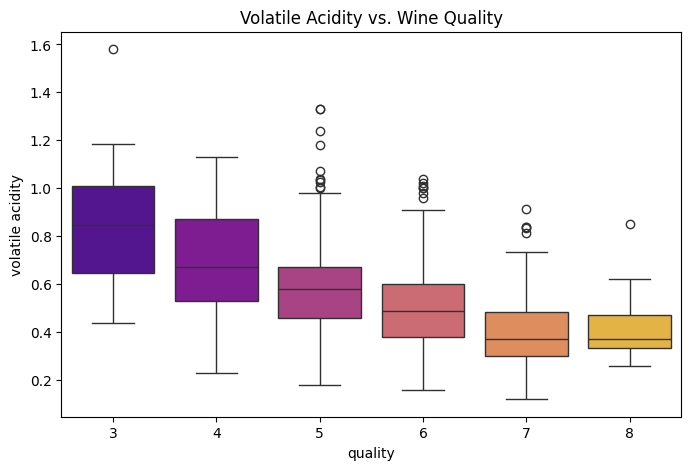


Conclusion: Yes, volatile acidity has a clear negative effect; as wine quality increases, the amount of volatile acidity tends to decrease.

## 5. Model Training and Comparison ##
Decision Tree Model Accuracy: 0.5594
Random Forest Model Accuracy: 0.6594

Conclusion: The Random Forest model performs significantly better than a single Decision Tree, providing a more accurate prediction of wine quality.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('wine_data.csv')

# --- Initial Data Check ---
# It's good practice to check for missing values first.
if df.isnull().sum().sum() > 0:
    print("Missing values found. Handling them by filling with the mean.")
    df = df.fillna(df.mean())
else:
    print("No missing values found in the dataset.")

print("\n---- Data Analysis Results ----\n")

# --- 1. Wine Quality Frequency and Range ---
print("## 1. Wine Quality Frequency and Range ##")
quality_counts = df['quality'].value_counts()
most_frequent_quality = quality_counts.index[0]
highest_quality = df['quality'].max()
lowest_quality = df['quality'].min()

print(f"The most frequently occurring wine quality score is: {most_frequent_quality}")
print(f"The highest quality score is: {highest_quality}")
print(f"The lowest quality score is: {lowest_quality}")
print("Conclusion: Most wines in this dataset are of average quality (5), with scores ranging from 3 to 8.\n")



# --- 2. Correlation of different features with Quality ---
print("## 2. Feature Correlation with Quality ##")
corr_matrix = df.corr()
fixed_acidity_corr = corr_matrix['quality']['fixed acidity']
alcohol_corr = corr_matrix['quality']['alcohol']
free_sulfur_corr = corr_matrix['quality']['free sulfur dioxide']

print(f"Correlation between 'fixed acidity' and quality: {fixed_acidity_corr:.4f}")
print(f"Correlation between 'alcohol' and quality: {alcohol_corr:.4f}")
print(f"Correlation between 'free sulfur dioxide' and quality: {free_sulfur_corr:.4f}")

# Visualize Alcohol vs Quality
plt.figure(figsize=(8, 5))
sns.barplot(x='quality', y='alcohol', data=df, palette='viridis')
plt.title('Alcohol Content vs. Wine Quality')
plt.savefig('alcohol_vs_quality.png')
plt.show()

print("\nConclusion: Alcohol content has the strongest positive correlation with quality, while fixed acidity has a weak positive correlation and free sulfur dioxide has a weak negative one.\n")


# --- 3. Average Residual Sugar for Best and Lowest Quality Wines ---
print("## 3. Average Residual Sugar by Quality Extremes ##")
avg_sugar_best_quality = df[df['quality'] == highest_quality]['residual sugar'].mean()
avg_sugar_lowest_quality = df[df['quality'] == lowest_quality]['residual sugar'].mean()

print(f"Average residual sugar for the best quality wines (score {highest_quality}): {avg_sugar_best_quality:.2f} g/L")
print(f"Average residual sugar for the lowest quality wines (score {lowest_quality}): {avg_sugar_lowest_quality:.2f} g/L")
print("\nConclusion: The best and lowest quality wines have very similar average residual sugar levels.\n")


# --- 4. Effect of Volatile Acidity on Quality ---
print("## 4. Effect of Volatile Acidity on Quality ##")
volatile_acidity_corr = corr_matrix['quality']['volatile acidity']
print(f"Correlation between 'volatile acidity' and quality: {volatile_acidity_corr:.4f}")

# Visualize Volatile Acidity vs Quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='volatile acidity', data=df, palette='plasma')
plt.title('Volatile Acidity vs. Wine Quality')
plt.savefig('volatile_acidity_vs_quality.png')
plt.show()

print("\nConclusion: Yes, volatile acidity has a clear negative effect; as wine quality increases, the amount of volatile acidity tends to decrease.\n")


# --- 5. Decision Tree vs. Random Forest Model Comparison ---
print("## 5. Model Training and Comparison ##")
# Define features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Model Accuracy: {dt_accuracy:.4f}")

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")

print("\nConclusion: The Random Forest model performs significantly better than a single Decision Tree, providing a more accurate prediction of wine quality.\n")

